<a href="https://colab.research.google.com/github/651413025/ML-Beginners/blob/main/DeepLearningTest_py.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import tensorflow as tf
import numpy as np
import random
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
from sklearn.datasets import make_classification

In [12]:
# กำหนด seed ให้คงที่สำหรับ reproducibility
np.random.seed(42)
tf.random.set_seed(42)
random.seed(42)

In [13]:

X, y = make_classification(n_samples=600, n_features=20, n_informative=20, n_redundant=0,
                           n_classes=10, n_clusters_per_class=1, class_sep=3.0,
                           flip_y=0, random_state=42)

In [14]:
X_train_s, y_train_s = X[:500], y[:500]
X_val_s, y_val_s = X[500:], y[500:]

In [21]:
# ปรับปรุงโมเดล
improved_model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(20,)),  # กำหนด input shape ที่นี่
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])


In [22]:
# คอมไพล์โมเดล
improved_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                       loss='sparse_categorical_crossentropy',
                       metrics=['accuracy'])

In [23]:
# ตั้งค่า callbacks สำหรับการฝึกโมเดล
callbacks_improved = [
    tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True),
    tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3)
]


In [24]:
# ฝึกโมเดลกับข้อมูล
history_improved = improved_model.fit(X_train_s, y_train_s, epochs=50, batch_size=32,
                                      validation_data=(X_val_s, y_val_s),
                                      callbacks=callbacks_improved,
                                      verbose=1)

Epoch 1/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.1650 - loss: 2.4329 - val_accuracy: 0.6900 - val_loss: 1.4892 - learning_rate: 0.0010
Epoch 2/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.4641 - loss: 1.5422 - val_accuracy: 0.7800 - val_loss: 0.9684 - learning_rate: 0.0010
Epoch 3/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.6791 - loss: 1.1258 - val_accuracy: 0.9100 - val_loss: 0.5474 - learning_rate: 0.0010
Epoch 4/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.7872 - loss: 0.7144 - val_accuracy: 0.9800 - val_loss: 0.2811 - learning_rate: 0.0010
Epoch 5/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8745 - loss: 0.5339 - val_accuracy: 1.0000 - val_loss: 0.1465 - learning_rate: 0.0010
Epoch 6/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8695 - loss: 0.3967 - val_accuracy: 0.9900 - val_loss: 0.0864 - learning_rate: 0.0010
Epoch 7/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9040 - loss: 0.3224 - val_acc

In [25]:
# ประเมินผลโมเดลที่ปรับปรุงแล้ว
y_pred_improved = np.argmax(improved_model.predict(X_val_s), axis=1)
print("\n--- Improved Model Classification Report ---")
print(classification_report(y_val_s, y_pred_improved))

1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step

--- Improved Model Classification Report ---
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00        11
           2       1.00      1.00      1.00        14
           3       1.00      1.00      1.00        14
           4       1.00      1.00      1.00         7
           5       0.93      1.00      0.97        14
           6       1.00      1.00      1.00        11
           7       1.00      1.00      1.00        11
           8       1.00      0.80      0.89         5
           9       1.00      1.00      1.00         8

    accuracy                           0.99       100
   macro avg       0.99      0.98      0.99       100
weighted avg       0.99      0.99      0.99       100



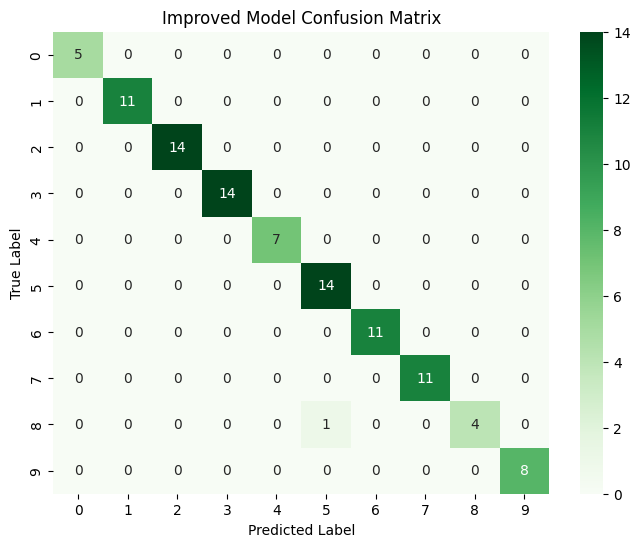

In [26]:
# แสดง Confusion Matrix สำหรับโมเดลที่ปรับปรุงแล้ว
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y_val_s, y_pred_improved), annot=True, cmap='Greens', fmt='d',
            xticklabels=range(10), yticklabels=range(10))
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Improved Model Confusion Matrix")
plt.show()